In [1]:
import numpy as np
from scipy.stats import norm

In [3]:
X_con = 1242 #clicks of control
N_con = 9886 #impressions of control
X_exp = 974 #clicks of experimental
N_exp = 10072 #impressions of experimental

In [6]:
alpha = 0.05 #significance level

p_con_hat = X_con / N_con #ctr of control
p_exp_hat = X_exp / N_exp #ctr of experimental

p_pooled_hat = (X_con + X_exp) / (N_con + N_exp)
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)

In [7]:
#standart error
SE = np.sqrt(pooled_variance)

In [8]:
#test statistics
Test_stat = (p_con_hat - p_exp_hat)/SE
#critical value using the standart normal distribution
z_crit = norm.ppf(1-alpha/2)

In [10]:
#margin of error
m = SE * z_crit
#two sided test and using symmetry property of Normal distribution so we multiple with 2
p_value = norm.sf(Test_stat)*2

In [13]:
# Confidence Interval
CI = [(p_con_hat-p_exp_hat) - SE * z_crit, (p_con_hat-p_exp_hat) + SE * z_crit]

In [15]:
if np.abs(Test_stat) >= z_crit:
    print('reject the null')
    print(p_value)

reject the null
7.832495206930039e-11


In [17]:
print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

Test Statistics stat:  6.503782823926798
Z-critical:  1.959963984540054
P_value:  7.832495206930039e-11
Confidence Interval of 2 sample Z-test for proportions:  [0.02 0.04]


In [23]:
p_value < 0.05

True

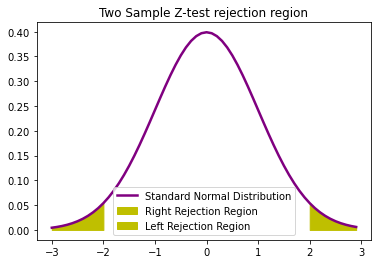

In [19]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>z_crit], norm.pdf(z[z>z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*z_crit], norm.pdf(z[z<(-1)*z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()